# VISUALIZE ACCIDENT HOTSPOTS AND CONTRIBUTING FACTORS 

# This data analysis is done by - Nikita Vipul Shah

# Data is selected from kaggle.com

# Importing all the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
accident_data = pd.read_csv("C:/Users/nikis/Downloads/accident_data.csv")

In [3]:
accident_data.head()

,Date,Time,Latitude,Longitude,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,No of Vehichles,Vehicle Speed,Day of Week,Month,Year
0,05-01-2022,15:30:00,40.7128,-74.0060,Highway,Foggy,Wet,Poor,Collision,Moderate,Speeding,Truck,1,45,Wednesday,January,2022
1,10-02-2022,18:45:00,41.8781,-87.6298,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,40,Thursday,February,2022
2,15-03-2022,12:00:00,37.7749,-122.4194,Intersection,Clear,Dry,Clear,Collision,Moderate,Weather,Car,2,25,Tuesday,March,2022
3,20-04-2022,09:20:00,34.0522,-118.2437,Highway,Clear,Dry,Clear,Collision,Minor,Other,Car,2,35,Wednesday,April,2022
4,25-05-2022,17:10:00,40.7128,-74.0060,Street,Rainy,Wet,Poor,Collision,Severe,Speeding,Car,1,50,Wednesday,May,2022


# checking the shape of the data

In [4]:
accident_data.shape

(147, 17)

# Displaying the columns of the dataset

In [5]:
accident_data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Location Description',
       'Weather Conditions', 'Road Conditions', 'Visibility', 'Accident Type',
       'Injury Severity', 'Contributing Factors', 'Vehicle Type',
       'No of Vehichles', 'Vehicle Speed', 'Day of Week', 'Month', 'Year'],
      dtype='object')

# Diaplaying the data type of the columns in the dataset

In [6]:
accident_data.dtypes

Date                     object
Time                     object
Latitude                float64
Longitude               float64
Location Description     object
Weather Conditions       object
Road Conditions          object
Visibility               object
Accident Type            object
Injury Severity          object
Contributing Factors     object
Vehicle Type             object
No of Vehichles           int64
Vehicle Speed             int64
Day of Week              object
Month                    object
Year                      int64
dtype: object

# Data Cleaning And Preparations

In [7]:
accident_data['Date'] = pd.to_datetime(accident_data['Date'], format='%d-%m-%Y')
accident_data['Time'] = pd.to_datetime(accident_data['Time'], format='%H:%M:%S')

# Exploratory Data Analysis(EDA)

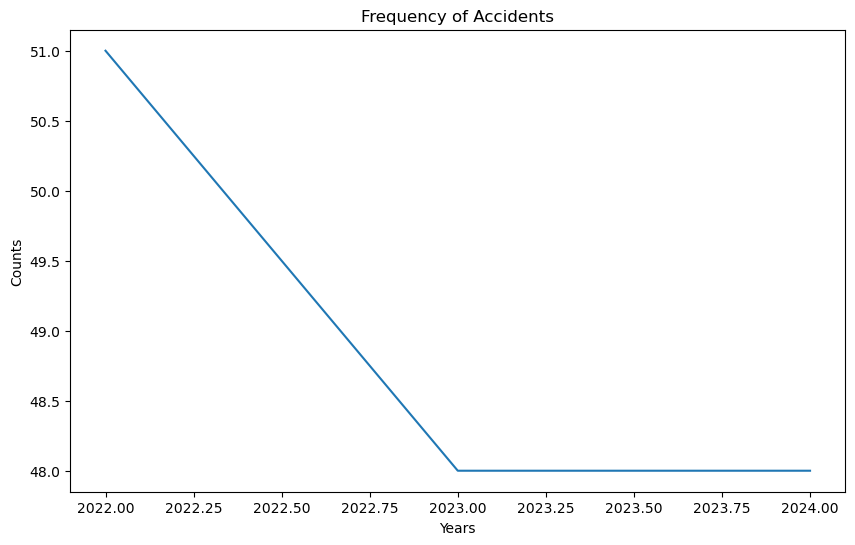

In [8]:
plt.figure(figsize=(10,6))
accident_data.groupby(accident_data['Date'].dt.year)['Accident Type'].count().plot(kind='line')
plt.title("Frequency of Accidents")
plt.xlabel("Years")
plt.ylabel("Counts")
plt.show()

# Identifying patterns and correlations and Visualize accidents by road conditions

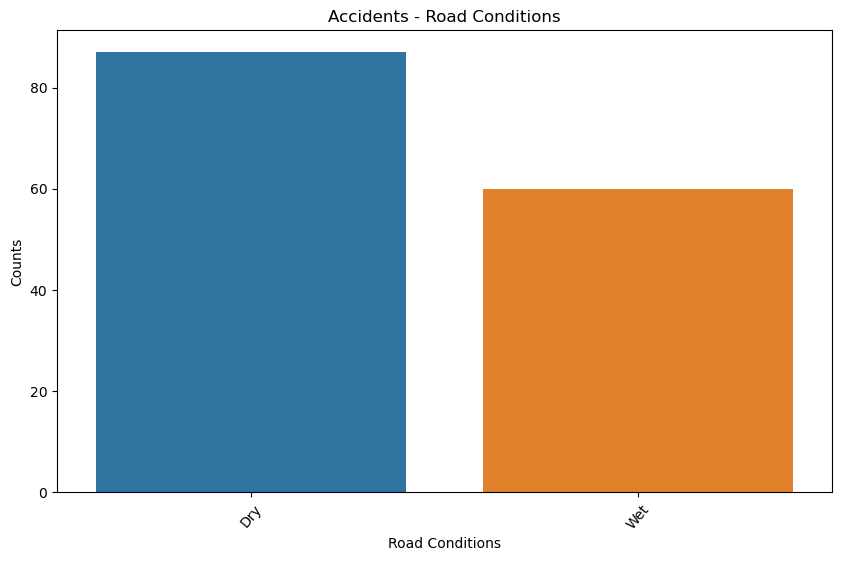

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x ='Road Conditions', data=accident_data, order=accident_data['Road Conditions'].value_counts().index)
plt.title("Accidents - Road Conditions")
plt.xlabel("Road Conditions")
plt.ylabel("Counts")
plt.xticks(rotation=50)
plt.show()

# Visualize the accidents by weather conditions

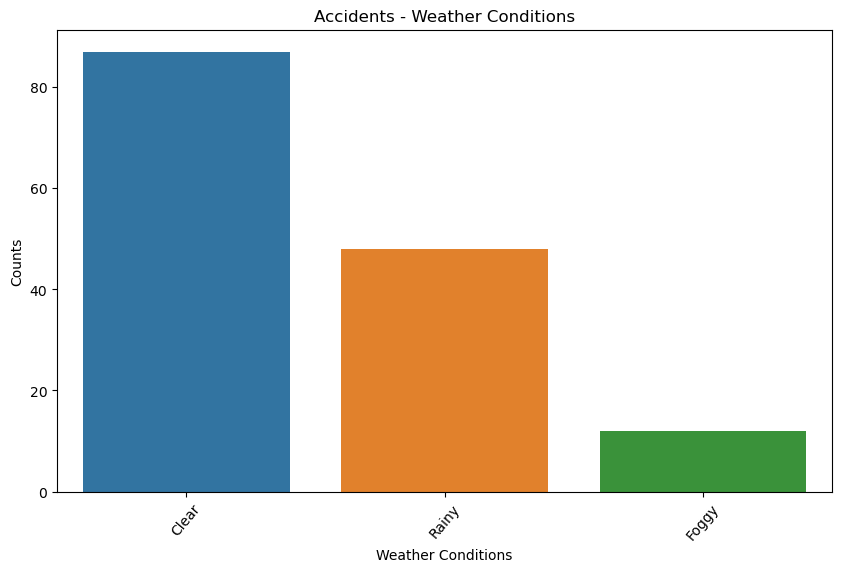

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x ="Weather Conditions", data=accident_data, order=accident_data["Weather Conditions"].value_counts().index)
plt.title("Accidents - Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Counts")
plt.xticks(rotation=50)
plt.show()


# Visualize accidents by the time of day

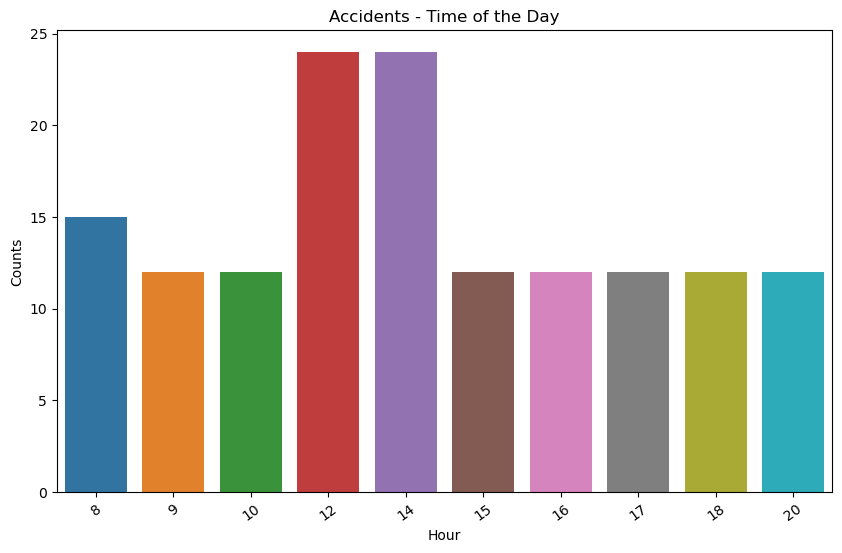

In [11]:
plt.figure(figsize=(10,6))
accident_data['Hour']=accident_data['Time'].dt.hour
sns.countplot(x ="Hour", data=accident_data)
plt.title("Accidents - Time of the Day")
plt.xlabel("Hour")
plt.ylabel("Counts")
plt.xticks(rotation=36)
plt.show()   

# Performing Spatial Analysis and Scatter plot of accident locations

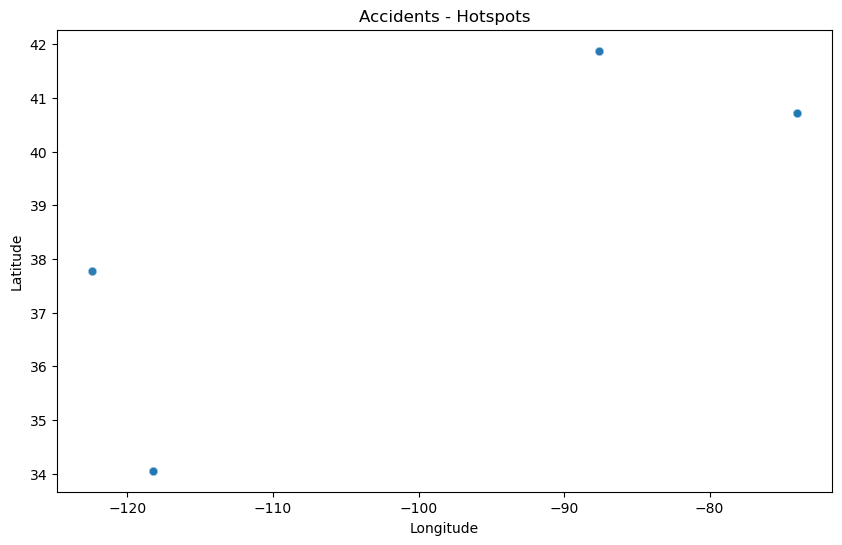

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x ="Longitude", y = "Latitude", data=accident_data, alpha = 0.1)
plt.title("Accidents - Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()